Group and sum by metaprogram problem solved with: https://stackoverflow.com/questions/39650749/group-by-sparse-matrix-in-scipy-and-return-a-matrix

#### Load modules

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

import scanpy as sc
import squidpy as sq

import scipy

from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
base_directory = '/n/scratch/users/s/sad167/EPN/Xenium/'
directory = base_directory + 'analysis/5_plots'
if not os.path.exists(directory):
    os.makedirs(directory)

In [11]:
# import metadata
metadata = pd.read_excel(base_directory+'scripts_revisions/SampleIdentifier.xlsx')

# extract sample name and path to raw data
SampleName = metadata['SampleName'].tolist()
SampleID = metadata['Sample'].tolist()
RawDataPath = metadata['RawDataPath'].tolist()

SampleName = [name for name in SampleName if name not in ['STEPN06_Region_5', 'STEPN10_Region_3', 'STEPN15_Region_1']]


In [15]:
# color palette
metaprogram_names = ["Cycling", "Neuroepithelial-like", "Radial-glia-like", 
                                       "Embryonic-neuronal-like", "Neuronal-like" ,"Ependymal-like", "MES-like", "Embryonic-like",
                                       "Unknown", 
                                       "T-cells", "Myeloid",  "Endothelial",  "Oligodendrocytes", 'Astrocyte', 'Neurons']

metaprogram_colors = ["gray50","#F99E93FF","#9E5E9BFF","#74ADD1FF",'#0F4F8B', "#ACD39EFF","#96410EFF", 'mistyrose1',
                                'grey90', 
                                '#FFF087FF',  '#F47942FF', 'violetred3', '#AECEBFFF', '#30A0A4FF', '#55A19EFF']

metaprogram_to_color = dict(zip(metaprogram_names, metaprogram_colors))

anndata_list = []
for i in range(len(SampleName)):
    adata = sc.read_10x_h5(filename = base_directory + 'data/raw_data/' + RawDataPath[i]+'/cell_feature_matrix.h5')
    df = pd.read_csv(base_directory + 'data/raw_data/' + RawDataPath[i]+'/cells.csv.gz')

    df.set_index(adata.obs_names, inplace=True)
    adata.obs = df.copy()

    adata.obsm["spatial"] = np.array([adata.obs.x_centroid*0.325, adata.obs.y_centroid*0.325]).transpose().astype('float64')
    
    # read metadata with annotations
    anno = pd.read_csv(base_directory + 'analysis/3_program_annotation/data/cell_ID_'  + SampleName[i] + '.csv', index_col = 0)

    # Replace values in the "group" column
    #anno['group'].replace({'Microglia': 'Myeloid'}, inplace=True)

    #if 'X' in anno.columns:
    #    anno.index = anno['X']
    
    #adata = adata[anno.index,:]
    
    adata.obs['Metaprogram'] = anno['group']
    adata.obs['Metaprogram'] = adata.obs['Metaprogram'].astype('category')
    adata.obs['sample'] = SampleName[i]

    # Add the color information to the AnnData object
    adata.uns['Metaprogram_colors'] = metaprogram_to_color

    # remove unassigned
    adata = adata[~adata.obs['Metaprogram'].isin(['Unknown'])]

    
    anndata_list.append(adata)
    
    print(SampleName[i])

adata = sc.concat(anndata_list) 

STEPN17_Region_1
STEPN06_Region_1
STEPN06_Region_2
STEPN06_Region_3
STEPN10_Region_1
STEPN10_Region_2
STEPN12_Region_1
STEPN12_Region_2
STEPN12_Region_3
STEPN14_Region_1
STEPN14_Region_2
STEPN19_Region_1
STEPN19_Region_2
STEPN16_Region_1
STEPN18_Region_1
STEPN01_Region_1
STEPN01_Region_2
STEPN01_Region_3
STEPN06_Region_4
STEPN12_Region_4


### Dot plot marker genes

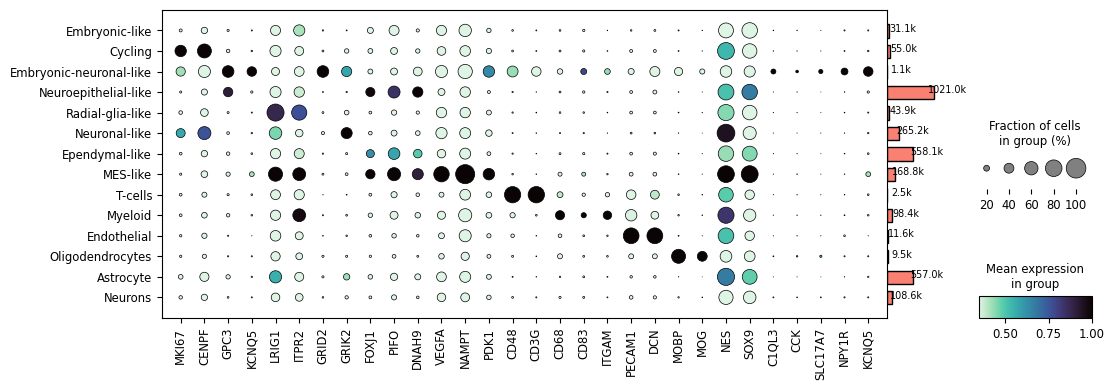

In [32]:

# color scale
cmap_reversed = plt.get_cmap('mako').reversed()

markers = ['MKI67', 'CENPF', # cycling
            'GPC3', 'KCNQ5', # neuroepithelial LIKE
           'LRIG1', 'ITPR2', # RG-LIKE
           'GRID2', 'GRIK2',  #neuronal-LIKE
           'FOXJ1', 'PIFO',  'DNAH9', # ependymal-LIKE
           'VEGFA', 'NAMPT', 'PDK1', # MES-like
           'CD48', 'CD3G',# TCELLS
              'CD68', 'CD83', 'ITGAM', # MYELOID
                     'PECAM1','DCN', # ENDOTHELIAL
           'MOBP', 'MOG', #OLIGOS
           'NES', 'SOX9', # ASTRO
          'C1QL3', 'CCK','SLC17A7','NPY1R','KCNQ5' # neuron
          ]


order_programs = ["Embryonic-like", "Cycling", "Embryonic-neuronal-like", "Neuroepithelial-like", "Radial-glia-like", 
                  "Neuronal-like" ,"Ependymal-like", "MES-like", 
                   "T-cells", "Myeloid",  "Endothelial",  "Oligodendrocytes", 'Astrocyte', 'Neurons']

dp = sc.pl.dotplot(adata, markers, 'Metaprogram', 
                   figsize = (12, 4), 
                   categories_order=order_programs,
                   vmin = 0.345,
                   #vmax = 0.2,
                   standard_scale = 'var',
                   return_fig = True)
dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5, cmap=cmap_reversed)
dp.savefig(directory+"/1dotplot_markers.pdf")

Dot plot fusion expression

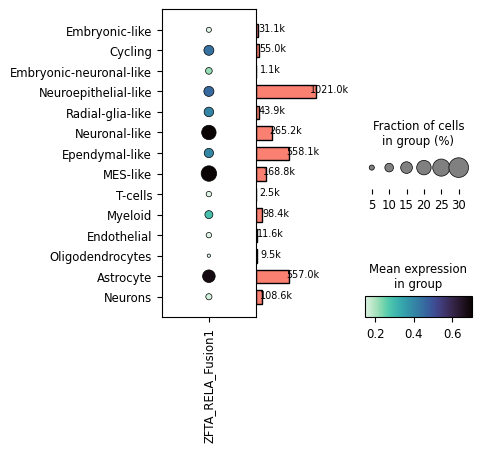

In [30]:

# color scale
cmap_reversed = plt.get_cmap('mako').reversed()

markers = ['ZFTA_RELA_Fusion1']


order_programs = ["Embryonic-like", "Cycling", "Embryonic-neuronal-like", "Neuroepithelial-like", "Radial-glia-like", 
                  "Neuronal-like" ,"Ependymal-like", "MES-like", 
                   "T-cells", "Myeloid",  "Endothelial",  "Oligodendrocytes", 'Astrocyte', 'Neurons']

dp = sc.pl.dotplot(adata, markers, 'Metaprogram', 
                   figsize = (4, 4), 
                   categories_order=order_programs,
                   vmin = 0.145,
                   vmax = 0.7,
                   standard_scale = 'var',
                   return_fig = True)
dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5, cmap=cmap_reversed)
dp.savefig(directory+"/1_dotplot_markers_ZR.pdf")